# Beautiful Soup


Parsing basic HTML content from webpages and extracting the information we need is what beautiful soup is designed for.

### Python Jobs

In [2]:
%pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import requests
from bs4 import BeautifulSoup

# Go to http://pythonjobs.github.io/ and press ctrl + shift + I or f12 and start inspecting the elements in the page

URL = 'http://pythonjobs.github.io/'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
# The raw html of the page
print(page.text)

# You can try the code below if the simple print above looks ugly in your environment
# import pprint
# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(page.text)

<!doctype html>
<!-- https://github.com/paulirish/html5-boilerplate/blob/master/index.html -->
<!-- paulirish.com/2008/conditional-stylesheets-vs-css-hacks-answer-neither/ -->
<!--[if lt IE 7 ]> <html lang="en" class="no-js ie6"> <![endif]-->
<!--[if IE 7 ]>    <html lang="en" class="no-js ie7"> <![endif]-->
<!--[if IE 8 ]>    <html lang="en" class="no-js ie8"> <![endif]-->
<!--[if (gte IE 9)|!(IE)]><!--> <html lang="en" class="no-js"> <!--<![endif]-->
<head>
  <!-- meta element for compatibility mode needs to be before
        all elements except title & meta
        msdn.microsoft.com/en-us/library/cc288325(VS.85).aspx -->
  <meta charset="utf-8">
  
  <!-- Always force latest IE rendering engine (even in intranet) & Chrome Frame
       Remove this if you use the .htaccess -->
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <title>The Free Python Job Board</title>
  <meta name="description" content="An international job board for Python roles">

  <!--  Because we have resp

In [6]:
# Get the list-title element from the page
elem = soup.find(id='list-title')
print(elem)

<h1 id="list-title">Most Recent Jobs</h1>


In [7]:
# Get the sections that have the "job_list" class (should be 1 element - the list of jobs)
section = soup.find_all("section", {"class": "job_list"})
print(section)

[<section class="job_list">
<div class="job" data-order="0" data-slug="datadog-open-source-software-engineer-python" data-tags="python,django,flask,falcon,celery">
<a class="go_button" href="/jobs/datadog-open-source-software-engineer-python.html">
		    	Read more <i class="i-right"></i>
</a>
<h1><a href="/jobs/datadog-open-source-software-engineer-python.html">Open Source Software Engineer - Python</a></h1>
<span class="info"><i class="i-globe"></i> New York City or Remote</span>
<span class="info"><i class="i-calendar"></i> Thu, 03 Jun 2021</span>
<span class="info"><i class="i-chair"></i> permanent</span>
<span class="info"><i class="i-company"></i> Datadog</span>
<p class="detail"> The Role In this role on our APM (tracing/profiling/debugging) team you will: Write open source code that instruments thousands of Python applications around the world. Drive our open source Python projects and...</p>
<div class="search_match"></div>
</div>
<div class="job" data-order="1" data-slug="rea

### Exercise 1 - Warmup
Get a list with all the jobs from the main page.
For each job print the title, the short description and the hyperlink to the full job description.

Hints:
Jobs appear to be divs that have class = "job".

For extracted elements (such as a div) you can use the .find() method. E.g. my_elem.find('p') should give you a p (p is the paragraph tag in html) element that is beneath my_elem in the html tree structure.

To access the text of an element you can use element.text. 

To access the href of an element you can use element['href']


In [16]:
jobs = section[0].find_all("div", {"class": "job"})

for job in jobs:
    title = job.find("h1").find("a").text
    description = job.find("p", {"class": "detail"}).text
    link = job.find("a")["href"]
    
    print(f"Title: {title}")
    print(f"Description: {description}")
    print(f"Link: {URL}{link}\n")



Title: Open Source Software Engineer - Python
Description:  The Role In this role on our APM (tracing/profiling/debugging) team you will: Write open source code that instruments thousands of Python applications around the world. Drive our open source Python projects and...
Link: http://pythonjobs.github.io//jobs/datadog-open-source-software-engineer-python.html

Title: Senior Python Developer
Description:  RealRate is Hiring Senior Python Developers! RealRate, the Artificial Intelligence rating agency is growing. We’re looking for a senior Python developer: More than 8 years of project experience. Python senior. Data...
Link: http://pythonjobs.github.io//jobs/realrate-gmbh-senior-python-developer.html

Title: Full Stack (Python & JS) Developer
Description:  Full Stack (Python & JS) Developer We’re looking for a contract Python & JS developer to help out with development of a greenfield open-source video sharing platform we are building. Remote working is possible if...
Link: http://pyt

### Politifact

In [22]:
import urllib.request, sys, time
import pandas as pd

pagesToGet = 1

upperframe = []  
for page in range(1, pagesToGet + 1):
    print('processing page :', page)
    url = f'https://www.politifact.com/factchecks/list/?page={page}'
    print(url)
    
    # an exception might be thrown, so the code should be in a try-except block
    try:
        # use the browser to get the url. This is a suspicious command that might blow up.
        page = requests.get(url)                              # this might throw an exception if something goes wrong.
    
    except Exception as e:                                    # this describes what to do if an exception is thrown
        error_type, error_obj, error_info = sys.exc_info()    # get the exception information
        print ('ERROR FOR LINK:', url)                         # print the link that cause the problem
        print (error_type, 'Line:', error_info.tb_lineno)     # print error info and line that threw the exception
        continue                                              # ignore this page. Abandon this and go back.
    time.sleep(2)   
    soup = BeautifulSoup(page.text, 'html.parser')
    frame = []
    links = soup.find_all('li', attrs={'class':'o-listicle__item'})
    print(len(links))
    filename = "NEWS.csv"
    f = open(filename,"w", encoding = 'utf-8')
    headers="Statement,Link, Source\n"
    f.write(headers)
    
    for link in links:
        Statement = link.find("div", attrs={'class':'m-statement__quote'}).text.strip()
        Link = "https://www.politifact.com"
        Link += link.find("div",attrs={'class':'m-statement__quote'}).find('a')['href'].strip()
        Source = link.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        frame.append((Statement, Link, Source))
        
        f.write(f'{Statement.replace(",","^")},{Link},{Source.replace(",","^")}\n')
    upperframe.extend(frame)
    
f.close()

data = pd.DataFrame(upperframe, columns=['Statement', 'Link', 'Source'])

processing page : 1
https://www.politifact.com/factchecks/list/?page=1
30


In [9]:
data

,Statement,Link,Source
0,“As your Lieutenant Governor…I cut your taxes.”,https://www.politifact.com/factchecks/2022/apr...,Rebecca Kleefisch
1,"Disney+ has had over 350,000 cancellations in ...",https://www.politifact.com/factchecks/2022/apr...,Facebook posts
2,The chairman of Virginia’s Republican Party ma...,https://www.politifact.com/factchecks/2022/apr...,Occupy Democrats
3,Christine Blasey Ford and Brett Kavanaugh were...,https://www.politifact.com/factchecks/2022/apr...,Viral image
4,"“You couldn’t buy a cannon when, in fact, the ...",https://www.politifact.com/factchecks/2022/apr...,Joe Biden
5,Poland palace that Biden visited is fake.,https://www.politifact.com/factchecks/2022/apr...,Facebook posts
6,Ukraine is the “money laundering and child sex...,https://www.politifact.com/factchecks/2022/apr...,Viral image
7,People protesting the Dakota Access pipeline “...,https://www.politifact.com/factchecks/2022/apr...,Facebook posts
8,The COVID-19 vaccines contain “HIV lipid wrapp...,https://www.politifact.com/factchecks/2022/apr...,Facebook posts
9,"""Special Forces arrest Deep State Dr. Anthony ...",https://www.politifact.com/factchecks/2022/apr...,Instagram posts


### Exercise 2
Scrape the date and the label (false, true, etc.) information for each statement as well.

Create a new dataframe where you have the Statement, Link, **Date**, Source and **Label** columns for the first page of politifact statements.

Hint: The 'alt' attribute of an image can come in handy


In [40]:
import re

pagesToGet = 1

frame = []
for page in range(1, pagesToGet + 1):
    url = f'https://www.politifact.com/factchecks/list/?page={page}'
    
    try:
        page = requests.get(url)
        
    except Exception as e:
        error_type, error_obj, error_info = sys.exc_info()
        print('ERROR FOR LINK:', url)
        print(error_type, 'Line:', error_info.tb_lineno)
        continue
    
    soup = BeautifulSoup(page.text, 'html.parser')
    posts = soup.find_all('li', attrs={'class':'o-listicle__item'})
    
    for post in posts:
        statement = post.find("div", attrs={'class':'m-statement__quote'}).text.strip()
        link = "https://www.politifact.com" + post.find("div", attrs={'class':'m-statement__quote'}).find('a')['href'].strip()
        source = post.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        date = re.search(r"[a-zA-Z]+ [0-9]{1,2}, [0-9]{4}", post.find('div', {'class': 'm-statement__desc'}).text).group(0)
        label = post.find('article')['class'][2].split('--')[1]
        
        frame += [(statement, link, source, date, label)]

data = pd.DataFrame(frame, columns=['statement', 'link', 'source', 'date', 'label'])
data

,statement,link,source,date,label
0,"""Ron Johnson is trying to let insurance compan...",https://www.politifact.com/factchecks/2022/apr...,Sarah Godlewski,"April 1, 2022",mostly-false
1,"Mehmet Oz ""called for a New Zealand-style gun ...",https://www.politifact.com/factchecks/2022/apr...,Dave McCormick,"April 4, 2022",mostly-true
2,McDonald’s added xylitol to its ice cream whic...,https://www.politifact.com/factchecks/2022/apr...,Facebook posts,"April 13, 2022",false
3,The Brooklyn subway attack was a false flag.,https://www.politifact.com/factchecks/2022/apr...,Facebook posts,"April 12, 2022",fire
4,“Just passed into law today: You cannot go 5 m...,https://www.politifact.com/factchecks/2022/apr...,Facebook posts,"April 11, 2022",false
5,"Brian Kemp ""dismissed concerns about voter fra...",https://www.politifact.com/factchecks/2022/apr...,Get Georgia Right,"April 8, 2022",false
6,"""Joe Biden is giving smartphones away to illeg...",https://www.politifact.com/factchecks/2022/apr...,Facebook posts,"April 11, 2022",half-true
7,“A bird pooped on Joe Biden during his speech”...,https://www.politifact.com/factchecks/2022/apr...,Facebook posts,"April 12, 2022",false
8,Video of a Q&A response from Amazon’s Alexa co...,https://www.politifact.com/factchecks/2022/apr...,TikTok posts,"April 6, 2022",false
9,Suggests ivermectin is an effective treatment ...,https://www.politifact.com/factchecks/2022/apr...,One America News,"April 6, 2022",false


### Weather

In [41]:
page = requests.get("https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  This
  <br/>
  Afternoon
 </p>
 <p>
  <img alt="This Afternoon: Sunny, with a high near 61. West southwest wind 9 to 16 mph, with gusts as high as 21 mph. " class="forecast-icon" src="newimages/medium/few.png" title="This Afternoon: Sunny, with a high near 61. West southwest wind 9 to 16 mph, with gusts as high as 21 mph. "/>
 </p>
 <p class="short-desc">
  Sunny
 </p>
 <p class="temp temp-high">
  High: 61 °F
 </p>
</div>


In [42]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()
print(period)
print(short_desc)
print(temp)

ThisAfternoon
Sunny
High: 61 °F


In [43]:
img = tonight.find("img")
desc = img['title']
print(desc)

This Afternoon: Sunny, with a high near 61. West southwest wind 9 to 16 mph, with gusts as high as 21 mph. 


In [44]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['ThisAfternoon',
 'Tonight',
 'Saturday',
 'SaturdayNight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday']

In [45]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['Sunny', 'Showers', 'ShowersLikely andBreezy thenSlight ChanceShowers', 'Mostly Clear', 'Sunny', 'Mostly Clear', 'Slight ChanceRain', 'Rain', 'Chance Rainthen MostlySunny']
['High: 61 °F', 'Low: 49 °F', 'High: 62 °F', 'Low: 45 °F', 'High: 61 °F', 'Low: 46 °F', 'High: 64 °F', 'Low: 50 °F', 'High: 61 °F']
['This Afternoon: Sunny, with a high near 61. West southwest wind 9 to 16 mph, with gusts as high as 21 mph. ', 'Tonight: A slight chance of rain before 11pm, then showers after 11pm.  Low around 49. West wind 8 to 17 mph becoming south after midnight. Winds could gust as high as 23 mph.  Chance of precipitation is 90%. New precipitation amounts between a tenth and quarter of an inch possible. ', 'Saturday: Showers likely, mainly before 11am.  Cloudy through mid morning, then gradual clearing, with a high near 62. Breezy, with a south southwest wind 17 to 22 mph becoming west southwest 10 to 15 mph in the morning. Winds could gust as high as 29 mph.  Chance of precipitation is 70%. New

In [46]:
import pandas as pd
weather = pd.DataFrame({
    "period": periods,
    "short_desc": short_descs,
    "temp": temps,
    "desc":descs
})
weather

,period,short_desc,temp,desc
0,ThisAfternoon,Sunny,High: 61 °F,"This Afternoon: Sunny, with a high near 61. We..."
1,Tonight,Showers,Low: 49 °F,"Tonight: A slight chance of rain before 11pm, ..."
2,Saturday,ShowersLikely andBreezy thenSlight ChanceShowers,High: 62 °F,"Saturday: Showers likely, mainly before 11am. ..."
3,SaturdayNight,Mostly Clear,Low: 45 °F,"Saturday Night: Mostly clear, with a low aroun..."
4,Sunday,Sunny,High: 61 °F,"Sunday: Sunny, with a high near 61. West wind ..."
5,SundayNight,Mostly Clear,Low: 46 °F,"Sunday Night: Mostly clear, with a low around 46."
6,Monday,Slight ChanceRain,High: 64 °F,Monday: A 20 percent chance of rain after 11am...
7,MondayNight,Rain,Low: 50 °F,"Monday Night: Rain. Mostly cloudy, with a low..."
8,Tuesday,Chance Rainthen MostlySunny,High: 61 °F,Tuesday: A chance of rain before 11am. Partly...


### Exercise 3 - Basic pandas revision



1. Calculate the average temperature for the data that you have obtained


In [53]:
def temp_to_num(temp: str) -> int:
    fahrenheit = temp.split()[1]
    return int(fahrenheit)

weather['temp'].map(temp_to_num).mean()

55.44444444444444


2. Calculate the average night temperature for the data that you have obtained


In [62]:
weather.set_index('period').filter(like="Night", axis=0)['temp'].map(temp_to_num).mean()

47.0


3. Display all of the periods when it's expected to be sunny for the data that you have obtained


In [66]:
weather[weather['short_desc'].str.contains("Sunny")]['period']

0    ThisAfternoon
4           Sunday
8          Tuesday
Name: period, dtype: object

# Selenium

For non-static websites (sites that are interactive e.g. with the use of javascript) it is usually not sufficient to use beautiful soup for parsing. 

Selenium is a tool that can mimic and automate human tasks (such as clicking, hovering, etc.) as well as allowing element selection on webpages. *The main workhorse behind the library is the Webdriver* which needs to be installed.

If you are not using Google Colab, then try installing the chrome web driver either using anaconda: conda install -c conda-forge python-chromedriver-binary or downloading the appropriate webdriver for your chrome version. Ask in the laboratory for more details if needed.

We suggest using Google Colab for this laboratory to avoid the local web driver installation step.


In [ ]:
# below commands are for google colab, see above text for more info on jupyter notebook version
%pip install selenium
%pip install webdriver-manager


In [83]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)




====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Driver [C:\Users\bogda\.wdm\drivers\chromedriver\win32\100.0.4896.60\chromedriver.exe] found in cache
C:\Users\bogda\AppData\Local\Temp/ipykernel_7464/3775026426.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object


In [84]:
from selenium.webdriver.common.by import By

def scrape_nba_salaries(year_from, year_to):
    df = pd.DataFrame(columns=['Player','Salary','Year']) # creates master dataframe 

    for year in range(year_from, year_to):
        url = f'https://hoopshype.com/salaries/players/{year}-{year + 1}/'
        print(url)
        driver.get(url)
        
        players = driver.find_elements(by=By.XPATH, value='//td[@class="name"]')
        salaries = driver.find_elements(by=By.XPATH, value='//td[@class="hh-salaries-sorted"]') 
        
        players_list = []
        for player in players:
            if player.text.strip():
                players_list += [player.text]
        
        salaries_list = []
        for salarie in salaries:
            salaries_list += [salarie.text]
        
        data_tuples = list(zip(players_list[1:], salaries_list[1:])) # list of each player's name and salary paired together
        
        temp_df = pd.DataFrame(data_tuples, columns=['Player','Salary'])
        temp_df['Year'] = year
        
        df = pd.concat([df, temp_df])
        
    return df

### Exercise 4



1. Calculate the average salary of an NBA player in 1990-1991 and the average salary of an NBA player in 2021-2022


In [104]:
df_old = scrape_nba_salaries(1990, 1991)
df_new = scrape_nba_salaries(2020, 2021)

https://hoopshype.com/salaries/players/1990-1991/
https://hoopshype.com/salaries/players/2020-2021/


In [105]:
print(df_old)
print(df_new)

                Player      Salary  Year
0        Patrick Ewing  $4,250,000  1990
1     Hot Rod Williams  $3,785,000  1990
2      Hakeem Olajuwon  $3,175,000  1990
3      Charles Barkley  $2,900,000  1990
4         Chris Mullin  $2,850,000  1990
..                 ...         ...   ...
347      Avery Johnson     $50,000  1990
348         Mario Elie     $50,000  1990
349  Anthony Frederick     $30,000  1990
350      Kelvin Upshaw     $30,000  1990
351        A.J. Wynder     $30,000  1990

[352 rows x 3 columns]
                Player       Salary  Year
0        Stephen Curry  $43,006,362  2020
1    Russell Westbrook  $41,358,814  2020
2           Chris Paul  $41,358,814  2020
3            John Wall  $41,254,920  2020
4         James Harden  $41,254,920  2020
..                 ...          ...   ...
573       Cam Reynolds      $33,299  2020
574       Andrew White      $25,000  2020
575         Tyler Hall      $25,000  2020
576      Elijah Bryant      $24,611  2020
577     Caleb Homesley

In [106]:
avg_salary_old = df_old['Salary'].map(lambda x: int(x.replace('$','').replace(',',''))).mean()
avg_salary_new = df_new['Salary'].map(lambda x: int(x.replace('$','').replace(',',''))).mean()

print(f'Average NBA salary from 1990-1991: ${avg_salary_old:,.0f}')
print(f'Average NBA salary from 2021-2022: ${avg_salary_new:,.0f}')

Average NBA salary from 1990-1991: $833,901
Average NBA salary from 2021-2022: $6,756,353



2. Create a dataframe with the team payrolls from 1999-2000, 2010-2011 and 2021-2022. Calculate the average salary of the top 10 teams in each year.


In [100]:
def scrape_nba_team_payrolls(year_from, year_to):
    df = pd.DataFrame(columns=['Team','Payroll','Year']) # creates master dataframe 

    for year in range(year_from, year_to):
        url = f'https://hoopshype.com/salaries/{year}-{year + 1}/'
        print(url)
        driver.get(url)
        
        teams = driver.find_elements(by=By.XPATH, value='//td[@class="name"]')
        payrolls = driver.find_elements(by=By.XPATH, value='//td[@class="hh-salaries-sorted"]') 
        
        teams_list = []
        for team in teams:
            if team.text.strip():
                teams_list += [team.text]
        
        payrolls_list = []
        for payroll in payrolls:
            payrolls_list += [payroll.text]
        
        data_tuples = list(zip(teams_list[1:], payrolls_list[1:])) # list of each team's name and payroll paired together
        
        temp_df = pd.DataFrame(data_tuples, columns=['Team','Payroll'])
        temp_df['Year'] = year
        
        df = pd.concat([df, temp_df])
        
    return df

In [101]:
team_payroll_old = scrape_nba_team_payrolls(1999, 2000)
team_payroll_mid = scrape_nba_team_payrolls(2010, 2011)
team_payroll_new = scrape_nba_team_payrolls(2020, 2021)

https://hoopshype.com/salaries/1999-2000/
https://hoopshype.com/salaries/2010-2011/
https://hoopshype.com/salaries/2020-2021/


In [103]:
print(team_payroll_old)

             Team      Payroll  Year
0        Portland  $73,898,705  1999
1        New York  $72,288,001  1999
2       LA Lakers  $55,018,533  1999
3         Indiana  $54,988,605  1999
4        Brooklyn  $53,245,461  1999
5      Washington  $53,194,441  1999
6           Miami  $52,496,573  1999
7         Houston  $52,269,367  1999
8            Utah  $50,348,426  1999
9       Cleveland  $46,547,966  1999
10        Phoenix  $46,544,037  1999
11         Boston  $46,152,875  1999
12      Milwaukee  $44,680,197  1999
13        Atlanta  $44,169,202  1999
14   Philadelphia  $43,890,593  1999
15      Minnesota  $42,642,272  1999
16    San Antonio  $42,529,801  1999
17        Detroit  $42,141,801  1999
18        Orlando  $41,586,801  1999
19         Denver  $40,677,095  1999
20     Sacramento  $40,113,125  1999
21         Dallas  $40,014,500  1999
22      Charlotte  $38,619,012  1999
23  Oklahoma City  $38,258,910  1999
24        Memphis  $37,432,688  1999
25   Golden State  $36,133,518  1999
2

In [111]:
def dollar_to_int(dollar: str):
    return int(dollar.replace('$','').replace(',',''))

avg_payroll_old = team_payroll_old.head(10)['Payroll'].map(dollar_to_int).mean()
avg_payroll_mid = team_payroll_mid.head(10)['Payroll'].map(dollar_to_int).mean()
avg_payroll_new = team_payroll_new.head(10)['Payroll'].map(dollar_to_int).mean()

print(f'Average NBA payroll from 1999-2000: ${avg_payroll_old:,.0f}')
print(f'Average NBA payroll from 2010-2011: ${avg_payroll_mid:,.0f}')
print(f'Average NBA payroll from 2021-2022: ${avg_payroll_new:,.0f}')

Average NBA payroll from 1999-2000: $56,429,608
Average NBA payroll from 2010-2011: $78,411,354
Average NBA payroll from 2021-2022: $144,350,214



3. Create a dataframe containing the 10 best paid NBA players for each of the 5 years from 2017-2018 to 2021-2022. This means you will have 50 entries in your dataframe.

    Display all of the players that appear more than 3 times in the dataframe (meaning they were in top 10 for at least 3 out of the 5 years). 
    Hint: .value_counts() method may be of use


In [160]:
def scrape_top_nba_player_salaries(year_from, year_to):
    df = pd.DataFrame(columns=['Player','Salary','Year']) # creates master dataframe 

    for year in range(year_from, year_to):
        url = f'https://hoopshype.com/salaries/players/{year}-{year + 1}/'
        print(url)
        driver.get(url)
        
        players = driver.find_elements(by=By.XPATH, value='//td[@class="name"]')
        salaries = driver.find_elements(by=By.XPATH, value='//td[@class="hh-salaries-sorted"]')[1:11] 
        
        players_list = [player.text for player in players if player.text.strip()][1:11]
        salaries_list = [salary.text for salary in salaries]
        
        data_tuples = list(zip(players_list, salaries_list))
        
        temp_df = pd.DataFrame(data_tuples, columns=['Player','Salary'])
        temp_df['Year'] = year
        
        df = pd.concat([df, temp_df])
        
    return df

In [161]:
best_paid_players = scrape_top_nba_player_salaries(2016, 2021)
best_paid_players

https://hoopshype.com/salaries/players/2016-2017/
https://hoopshype.com/salaries/players/2017-2018/
https://hoopshype.com/salaries/players/2018-2019/
https://hoopshype.com/salaries/players/2019-2020/
https://hoopshype.com/salaries/players/2020-2021/


,Player,Salary,Year
0,LeBron James,"$30,963,450",2016
1,DeMar DeRozan,"$26,540,100",2016
2,Russell Westbrook,"$26,540,100",2016
3,Mike Conley,"$26,540,100",2016
4,James Harden,"$26,540,100",2016
5,Kevin Durant,"$26,540,100",2016
6,Al Horford,"$26,540,100",2016
7,Dirk Nowitzki,"$25,000,000",2016
8,Carmelo Anthony,"$24,559,380",2016
9,Damian Lillard,"$24,328,425",2016


In [164]:
best_paid_players_count = count(best_paid_players, 'Player', sort=True)
best_paid_players_count[best_paid_players_count['n'] >= 3]

,Player,n
0,Russell Westbrook,5
1,LeBron James,5
2,James Harden,5
3,Stephen Curry,4
4,Mike Conley,4
5,Kevin Durant,3
6,Chris Paul,3
7,Paul George,3
8,Kyle Lowry,3
9,Blake Griffin,3


# News Articles

In [2]:
%pip install newspaper3k

  Using cached newspaper3k-0.2.8-py3-none-any.whl (211 kB)
  Using cached feedfinder2-0.0.4.tar.gz (3.3 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
  Using cached jieba3k-0.35.1.zip (7.4 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached feedparser-6.0.8-py3-none-any.whl (81 kB)
  Using cached tinysegmenter-0.3.tar.gz (16 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for tinysegmenter, since package 'wheel' is not installed.
Using legacy 'setup.py install' for feedfinder2, since package 'wheel' is not installed.
Using legacy 'setup.py install' for jieba3k, since package 'wheel' is not installed.
    Running setup.py install for tinysegmenter: started
    Running setup.py install for tinysegmenter: finished 

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
# Articles
import nltk
nltk.download('punkt')
from newspaper import Article

article = Article('https://www.digi24.ro/stiri/actualitate/politica/klaus-iohannis-la-intalnirea-cu-premierul-belgiei-trebuie-sa-asiguram-un-sprijin-substantial-si-coerent-pentru-republica-moldova-1903405')
article.download()
article.parse()
article.nlp()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bogda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
article.text

'Prim-ministrul Regatului Belgiei, Alexander De Croo, s-a întâlnit marți, la Cotroceni, cu Klaus Iohannis. După vizita la București, șeful guvernului belgian va merge la Chișinău. În cadrul discuțiilor, președintele României a subliniat importanța unui „sprijin substanțial și coerent pentru Republica Moldova, de natură politică, financiară și logistică, precum și în privința securității energetice”.\n\n„Este esențial să consolidăm reziliența strategică a noastră, a Aliaților, precum și pe cea a partenerilor noștri, în special a celor mai vulnerabili, cum sunt Republica Moldova și Georgia. În acest context, am subliniat susținerea deplină a României pentru Republica Moldova, pentru parcursul său european, și am atras atenția asupra sprijinirii sale ferme și imediate în gestionarea fluxurilor crescute de refugiați cu care această țară se confruntă, alături de multiple alte provocări”, a spus președintele României.\n\n„Trebuie să asigurăm un sprijin substanțial și coerent pentru Republica

In [6]:
article.publish_date

In [7]:
article.keywords

['întâlnirea',
 'să',
 'moldova',
 'pentru',
 'și',
 'trebuie',
 'precum',
 'sprijin',
 'republica',
 'în',
 'substanțial',
 'va',
 'premierul',
 'la']

In [8]:
article.summary

'Prim-ministrul Regatului Belgiei, Alexander De Croo, s-a întâlnit marți, la Cotroceni, cu Klaus Iohannis.\nDupă vizita la București, șeful guvernului belgian va merge la Chișinău.\nÎn cadrul discuțiilor, președintele României a subliniat importanța unui „sprijin substanțial și coerent pentru Republica Moldova, de natură politică, financiară și logistică, precum și în privința securității energetice”.\n„Este esențial să consolidăm reziliența strategică a noastră, a Aliaților, precum și pe cea a partenerilor noștri, în special a celor mai vulnerabili, cum sunt Republica Moldova și Georgia.\n„Trebuie să asigurăm un sprijin substanțial și coerent pentru Republica Moldova, de natură politică, financiară și logistică, precum și în privința securității energetice”, a adăugat Klaus Iohannis.'

In [9]:
# Let's get some financial news from marketwatch.com
import newspaper
from newspaper import Config
from newspaper import Article, ArticleException

USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'

config = Config()
config.browser_user_agent = USER_AGENT
config.request_timeout = 10

base_url = 'https://www.marketwatch.com'
article_urls = set()
marketwatch = newspaper.build(base_url, config=config, memoize_articles=False, language='en')

for sub_article in marketwatch.articles:
    article = Article(sub_article.url, config=config, memoize_articles=False, language='en')
    article.download()
    
    try:
        article.parse()
    except:
        print("Article not found for ", sub_article.url)
        
    if article.url not in article_urls:
        article_urls.add(article.url)

    # The majority of the article elements are located
    # within the meta data section of the page's
    # navigational structure
    article_meta_data = article.meta_data

    published_date = {value for (key, value) in article_meta_data.items() if key == 'parsely-pub-date'}
    article_published_date = " ".join(str(x) for x in published_date)

    authors = sorted({value for (key, value) in article_meta_data.items() if key == 'parsely-author'})
    article_author = ', '.join(authors)

    title = {value for (key, value) in article_meta_data.items() if key == 'parsely-title'}
    article_title = " ".join(str(x) for x in title)

    keywords = ''.join({value for (key, value) in article_meta_data.items() if key == 'keywords'})
    keywords_list = sorted(keywords.lower().split(','))
    article_keywords = ', '.join(keywords_list)

    tags = ''.join({value for (key, value) in article_meta_data.items() if key == 'parsely-tags'})
    tag_list = sorted(tags.lower().split(','))
    article_tags = ', '.join(tag_list)

    summary = {value for (key, value) in article_meta_data.items() if key == 'description'}
    article_summary = " ".join(str(x) for x in summary)

    # the replace is used to remove newlines
    article_text = article.text.replace('\n', '')
    # print(article_text)
    print(article_summary)

Micha Kaufman, CEO of freelance services marketplace Fiverr, talks to MarketWatch about the growing shift to hybrid work models amid the Great Resignation.
In this episode, The Moneyist talks to a man whose rich ex-wife who didn't exactly pay her share during the marriage.
Getting to Work With: Ben Chestnut on why being a 'professional CEO' could cause business leaders to miss out on creative thinking.
Article not found for  https://www.marketwatch.com/video/love-money

If you’re part of the financial independence retire early (FIRE) movement, your plan is to retire well ahead of traditional retirement age. Watch out for these unexpected tax bills.
Article not found for  https://www.marketwatch.com/video/good-company

Stellar gains don't compensate investors for extraordinary volatility.
Target date funds are changing the structure of the stock market, says Vincent Deluard at investment firm StoneX.
"A college town with a good bus system would be OK, but secondary to the urban area."
T

### Exercise 5

Let's use our naive afinn lexicon method for sentiment analysis on the latest marketwatch.com news articles.


In [5]:
class Color:
    GREEN = '\033[92m'
    RED = '\033[91m'
    MAGENTA = '\033[95m'
    END = '\033[0m'

In [1]:
from afinn import Afinn
import newspaper
from newspaper import Config
from newspaper import Article, ArticleException

afinn = Afinn()

USER_AGENT = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'

config = Config()
config.browser_user_agent = USER_AGENT
config.request_timeout = 10

base_url = 'https://www.marketwatch.com'
article_urls = set()
marketwatch = newspaper.build(base_url, config=config, memoize_articles=False, language='en')


1. Display the first 30 titles and their afinn score. (apply afinn only on the title)


In [6]:
article_count = 0
for sub_article in marketwatch.articles:
    if article_count > 10:
        break
    
    article = Article(sub_article.url, config=config, memoize_articles=False, language='en')
    article.download()
    
    try:
        article.parse()
    except:
        print("Article not found for ", sub_article.url)

    article_meta_data = article.meta_data

    title = {value for (key, value) in article_meta_data.items() if key == 'parsely-title'}
    article_title = " ".join(str(x) for x in title)
    
    print(f'{article_title} - score: {Color.MAGENTA}{afinn.score(article_title)}{Color.END}')
    
    article_count += 1

Why more workers and companies are switching to freelance gigs - MarketWatch - score: 0.0
What happens if you don't discuss money before walking down the aisle - MarketWatch - score: 0.0
Why Mailchimp CEO stresses creativity over optimization - MarketWatch - score: 0.0
Article not found for  https://www.marketwatch.com/video/love-money
 - score: 0.0
These tax traps could derail your early retirement plan - MarketWatch - score: -3.0
Article not found for  https://www.marketwatch.com/video/good-company
 - score: 0.0
Meme stocks are back, and you should run, not walk, the other way - score: 0.0
Opinion: Stocks tanked in the first quarter, and new research shows there should be a reversal by the end of June - score: 0.0
I no longer drive and want to retire in a highly walkable urban area with many cultural activities — where should I go? - score: 0.0
Tesla earnings: Wall Street worries about China shutdowns, Musk's Twitter distraction - score: -5.0
Activision Blizzard says it will cooperat


2. Display the first 30 titles and their corresponding article text afinn score. (apply afinn on the text of the article)


In [3]:
article_count = 0
for sub_article in marketwatch.articles:
    if article_count > 10:
        break
    
    article = Article(sub_article.url, config=config, memoize_articles=False, language='en')
    article.download()
    
    try:
        article.parse()
    except:
        print("Article not found for ", sub_article.url)

    article_meta_data = article.meta_data

    title = {value for (key, value) in article_meta_data.items() if key == 'parsely-title'}
    article_title = " ".join(str(x) for x in title)
    
    print(f'{article_title} - score: {Color.MAGENTA}{afinn.score(article.text)}{Color.END}')
    
    article_count += 1

Why more workers and companies are switching to freelance gigs - MarketWatch - score: 5.0
What happens if you don't discuss money before walking down the aisle - MarketWatch - score: 2.0
Why Mailchimp CEO stresses creativity over optimization - MarketWatch - score: 0.0
Article not found for  https://www.marketwatch.com/video/love-money
 - score: 0.0
These tax traps could derail your early retirement plan - MarketWatch - score: -2.0
Article not found for  https://www.marketwatch.com/video/good-company
 - score: 0.0
Meme stocks are back, and you should run, not walk, the other way - score: 17.0
Opinion: Stocks tanked in the first quarter, and new research shows there should be a reversal by the end of June - score: -2.0
I no longer drive and want to retire in a highly walkable urban area with many cultural activities — where should I go? - score: 65.0
Tesla earnings: Wall Street worries about China shutdowns, Musk's Twitter distraction - score: -8.0
Activision Blizzard says it will coope


3. Display the title of the first 20 clearly positive articles (we'll say an article is clearly positive if its afinn score is >= 10)


In [7]:
article_count = 0
for sub_article in marketwatch.articles:
    if article_count >= 20:
        break
    
    article = Article(sub_article.url, config=config, memoize_articles=False, language='en')
    article.download()
    
    try:
        article.parse()
    except:
        pass
        
    score = afinn.score(article.text)
    
    if score < 10:
        continue

    article_meta_data = article.meta_data

    title = {value for (key, value) in article_meta_data.items() if key == 'parsely-title'}
    article_title = " ".join(str(x) for x in title)
    
    print(f'{article_title} - score: {Color.GREEN}{afinn.score(article.text)}{Color.END}')
    
    article_count += 1

Article not found for  https://www.marketwatch.com/video/love-money
Article not found for  https://www.marketwatch.com/video/good-company
Meme stocks are back, and you should run, not walk, the other way - score: 17.0
I no longer drive and want to retire in a highly walkable urban area with many cultural activities — where should I go? - score: 65.0
Enjoy your Easter chocolate --- but give a thought to who harvested the cocoa - score: 40.0
‘We are not sure how prepared we are for retirement’ – we are 60 and 61, and don’t know how much longer we can work, have $360,000 in retirement savings and a pension - score: 87.0
Three things to take care of when you retire—your future self will thank you for it - score: 42.0
'Please help!' It seems like I have been paying my child's student loan forever. How much longer must I pay it off? - score: 22.0
A Top Personal Finance Expert on Saving for Retirement in Trying Times - score: 105.0
Treasuries Have Been Volatile. Your Portfolio Could Be Part o


4. Display the title of the first 20 clearly negative articles (we'll say an article is clearly positive if its afinn score is <= -10)


In [8]:
article_count = 0
for sub_article in marketwatch.articles:
    if article_count >= 20:
        break
    
    article = Article(sub_article.url, config=config, memoize_articles=False, language='en')
    article.download()
    
    try:
        article.parse()
    except:
        pass
        
    score = afinn.score(article.text)
    
    if score > -10:
        continue

    article_meta_data = article.meta_data

    title = {value for (key, value) in article_meta_data.items() if key == 'parsely-title'}
    article_title = " ".join(str(x) for x in title)
    
    print(f'{article_title} - score: {Color.RED}{afinn.score(article.text)}{Color.END}')
    
    article_count += 1

Article not found for  https://www.marketwatch.com/video/love-money
Article not found for  https://www.marketwatch.com/video/good-company
Opinion: Covid booster shots are effective up to a point — here's how future vaccines will work - score: -17.0
New AP-NORC poll gauges emotions whipped up over the discussion of race and sex in U.S. classrooms - score: -16.0
Federal Pandemic Money Has Spurred Fraud. Tax Refunds Are Getting Filched. - score: -94.0
Americans of all ages are failing at financial literacy - score: -13.0
'The weight of this debt is crushing': I'm 74, and a retired speech-language pathologist with a student-loan debt of $200K. Am I obliged to pay it off? - score: -13.0
New York man charged with running illegal bitcoin ATMs in laundromats to help criminals launder money, using an anonymous Snapchat account - score: -26.0
Owner of Florida rehab network convicted in $58 million fraud. She submitted patients to excessive drug testing and offered them kickbacks for signing up -

# Reddit

In [ ]:
%pip install praw

In [10]:
import praw
reddit = praw.Reddit(client_id='sIXZTihLNiKiHw',
                     client_secret='EjfAsmz5z8mDbZohe4UPYTPIZsYmOQ',
                     user_agent='Test1', check_for_async=False)

In [11]:
# Get the first 10 hot posts on the main page of reddit (/all)
hot_posts = reddit.subreddit('all').hot(limit=10)
for post in hot_posts:
    print(post.title, post.score)

You do you 24674
One of my favourite Easter Eggs in gaming 23149
It's honestly like that too often 14729
nice parking man 12574
Various types of Screw Anchors 25662
Body hair makes great protection against mosquito 14901
TIL that in 1999 a British man, angered at being charged £20 for going £10 overdrawn, legally changed his name to "Yorkshire Bank plc are Fascist Bastards" just to receive a return cheque in that name to settle the account. 21449
Fire Giant POV while fighting the Tarnished 31858
Teacher loses it 16000
Grover Krantz's dog was a wolfhound 26911


In [12]:
import pandas as pd

posts = []
ml_subreddit = reddit.subreddit('MachineLearning')
for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
posts

,title,score,id,subreddit,url,num_comments,body,created
0,[D] Simple Questions Thread,5,u0jcur,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,69,Please post your questions here instead of cre...,1.649603e+09
1,[D] Machine Learning - WAYR (What Are You Read...,10,u0pnhf,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,2,This is a place to share machine learning rese...,1.649621e+09
2,[P] Comparing Default VS Custom Reward Functio...,19,u4wvlc,MachineLearning,https://v.redd.it/zynuv5hb8pt81,2,,1.650113e+09
3,[D] Paper Explained – SEER explained: Vision M...,17,u4tlk2,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,1,[https://youtu.be/XHAoV\_nKr1o](https://youtu....,1.650099e+09
4,[D] Spotify's Podcast Search Explained,7,u4w8x4,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,I wrote [this article](https://www.pinecone.io...,1.650110e+09
5,[P] RR-GCN now supports multi-modal learning!,7,u4uvac,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,We have just released v0.0.2 of our RR-GCN. Th...,1.650104e+09
6,[D] How DALL-E 2 Actually Works,180,u496k8,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,15,Here's a video explaining the overall architec...,1.650033e+09
7,[R] Machine learning in management of precauti...,3,u4vtil,MachineLearning,https://www.reddit.com/r/MachineLearning/comme...,0,"In this work, we have covered a deep study of ...",1.650109e+09
8,[D] AskScience AMA Series: We are seven leadin...,139,u4bfii,MachineLearning,/r/askscience/comments/u45i29/askscience_ama_s...,6,,1.650039e+09
9,[R] Useful method to train models for adversar...,1,u4y5r4,MachineLearning,https://www.mdpi.com/1999-5903/14/4/108,0,,1.650117e+09


In [13]:
# Getting a particular post by url or by id
submission = reddit.submission(url="https://www.reddit.com/r/MapPorn/comments/a3p0uq/an_image_of_gps_tracking_of_multiple_wolves_in/")
# or 
submission = reddit.submission(id="a3p0uq") #id comes after comments/

In [14]:
# Accessing the comments of a post
for top_level_comment in submission.comments:
    try:
        print(top_level_comment.body, top_level_comment.score)
        print('----------')
    except AttributeError:
        print(top_level_comment)
        print('----------')

Source: [https://www.facebook.com/VoyageursWolfProject/](https://www.facebook.com/VoyageursWolfProject/) 1
----------
I thought this was a shit post made in paint before I read the title 3643
----------
Wow, that’s very cool.  To think how keen their senses must be to recognize and avoid each other and their territories.  Plus, I like to think that there’s one from the white colored clan who just goes way into the other territories because, well, he’s a badass. 7480
----------
White wolf is a dick constantly trespassing other's territories. 2947
----------
That’s really cool. The edges are surprisingly defined. 780
----------
[Link to Story](https://www.duluthnewstribune.com/news/science-and-nature/4538836-voyageurs-national-park-wolves-eating-beaver-and-blueberries-not)  345
----------
You know the white wolf fucked some red's bitch for sure.  865
----------
Cool to imagine that there are similar zones surrounding all these, we just didn't tag those wolves.  76
----------
It’s wild ho

In [ ]:
# Access all comments from the post (including replies to comments)
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    print(comment.body)
    print('----------')

### Exercise 6



Pick a subreddit of your choice and:


In [20]:
subreddit = reddit.subreddit('TrueOffMyChest')


1. Create a dataframe containing title, score, id, subreddit, url, num_comments, body, time_created for the top 100 posts of all time of that subreddit.


In [57]:
posts = subreddit.top('all', limit=100)

def posts_to_df(posts):
    posts_data = []
    for post in posts:
        title = post.title
        score = post.score
        id = post.id
        subreddit = str(post.subreddit)
        url = post.url
        num_comments = post.num_comments
        body = post.selftext
        time_created = post.created
        
        posts_data += [(title, score, id, subreddit, url, num_comments, body, time_created)]
    
    return pd.DataFrame(posts_data, columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

df = posts_to_df(posts)
df

,title,score,id,subreddit,url,num_comments,body,created
0,"Probably my last post, from Ukraine",233859,t037ne,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,10158,"Well, I guess this is it then. Sirens are wail...",1.645681e+09
1,"i might die in 7 hours, and I'm not afraid.",113254,t9m7fl,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,12313,I (14M) have a bone disease known as Multiple ...,1.646761e+09
2,As a grocery worker I’m so fucking tired of th...,105258,g0bpa2,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,4676,Title,1.586751e+09
3,"I’m Russian, hear me out.",104235,t0ammn,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,4909,"From this whole situation, it feels like you w...",1.645708e+09
4,My wife doesn't know. But once or twice a mont...,90786,hdipdr,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,3099,It's honestly the most exciting thrill that I ...,1.592789e+09
...,...,...,...,...,...,...,...,...
95,My birthday sucked,33205,qpflle,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,6119,Mid 30s here. Normally not one to complain but...,1.636384e+09
96,Playing online games as a woman is exhausting,32597,mqkdlb,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,5005,Men treat women like we aren’t even human bein...,1.618380e+09
97,Wife caught me cheating,32571,t3ja7i,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,2854,So yesterday it finally happened. My wife of 8...,1.646065e+09
98,"I'm a guy, and I was raped. I can't keep it to...",32497,hedfza,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,1013,"This is a throwaway. And I'm on mobile, so sor...",1.592914e+09



2. Split your dataframe into words (e.g. unnest_tokens) and display the 20 most frequently occurring words after you have cleaned the dataframe of common stop words. Recommended to use the extended custom stop words list from the n-grams laboratory.


In [24]:
from tidytext import unnest_tokens

df_words = unnest_tokens(df, "word", "body")
df_words

,title,score,id,subreddit,url,num_comments,created,word
0,"Probably my last post, from Ukraine",233861,t037ne,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,10158,1.645681e+09,well
0,"Probably my last post, from Ukraine",233861,t037ne,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,10158,1.645681e+09,i
0,"Probably my last post, from Ukraine",233861,t037ne,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,10158,1.645681e+09,guess
0,"Probably my last post, from Ukraine",233861,t037ne,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,10158,1.645681e+09,this
0,"Probably my last post, from Ukraine",233861,t037ne,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,10158,1.645681e+09,is
...,...,...,...,...,...,...,...,...
99,Redditors know nothing about Iran and it frust...,32476,ekad1u,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,1742,1.578213e+09,showing
99,Redditors know nothing about Iran and it frust...,32476,ekad1u,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,1742,1.578213e+09,off
99,Redditors know nothing about Iran and it frust...,32476,ekad1u,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,1742,1.578213e+09,the
99,Redditors know nothing about Iran and it frust...,32476,ekad1u,TrueOffMyChest,https://www.reddit.com/r/TrueOffMyChest/commen...,1742,1.578213e+09,cuisine


In [31]:
from nltk.corpus import stopwords
from siuba import *

def remove_stopwords(df):
    basic_stop_words = stopwords.words('english')
    punctuation_signs = ['\'', "''", ';', '"', ',', '.', '!', '?', '/', '[', ']', '(', ')', '“', '”', '’', '‘', '``', "--", "{", "}", "|"]
    custom_stop_words = ["a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

    stop_words = basic_stop_words + punctuation_signs + custom_stop_words
    
    df = df[~df['word'].isin(stop_words)]
    return df
    

df_clean = remove_stopwords(df_words)
df_count = count(df_clean, _['word'], sort=True)
df_count.head(20)

,word,n
0,people,132
1,edit,79
2,years,64
3,dont,62
4,life,55
5,time,47
6,2,46
7,family,45
8,work,45
9,feel,43



Pick 4 subreddits of your choice and:


In [33]:
subreddits = ['tifu', 'depression', 'AmItheAsshole', 'legaladvice']


3. Create a dataframe containing title, score, id, subreddit, url, num_comments, body, time_created for the top 100 posts of all time of each subreddit.


In [58]:
posts = list(map(lambda x: reddit.subreddit(x).top('all', limit=100), subreddits))

dfs = pd.concat(list(map(posts_to_df, posts)))
dfs

,title,score,id,subreddit,url,num_comments,body,created
0,TIFU by buying everyone an AncestryDNA kit and...,167369,a99fw9,tifu,https://www.reddit.com/r/tifu/comments/a99fw9/...,8885,"Earlier this year, AncestryDNA had a sale on t...",1.545691e+09
1,TIFU by living in a dark bedroom for 6 years.,142567,ak2k64,tifu,https://www.reddit.com/r/tifu/comments/ak2k64/...,2574,The overhead fan in our bedroom uses one of th...,1.548522e+09
2,TIFU by spending the last year on reddit talki...,140222,bbgmzp,tifu,https://www.reddit.com/r/tifu/comments/bbgmzp/...,3132,Today was the day I realised I messed up by no...,1.554862e+09
3,TIFU by owning a Golden Retriever while being ...,137083,i3xnlq,tifu,https://www.reddit.com/r/tifu/comments/i3xnlq/...,7118,Sigh. \n\nWork was rough today and all I wante...,1.596597e+09
4,TIFU: I have officially branded myself as the ...,125479,bpr2iy,tifu,https://www.reddit.com/r/tifu/comments/bpr2iy/...,15943,This is his now ex-wife.\n\nDid he not realize...,1.558099e+09
...,...,...,...,...,...,...,...,...
95,Exwife is going off the deep end. This is in N...,18210,arynah,legaladvice,https://www.reddit.com/r/legaladvice/comments/...,108,I get my daughter every other weekend. She’s 9...,1.550506e+09
96,UPDATE: Hoarder in my building died with a bad...,18178,b5sk1c,legaladvice,https://www.reddit.com/r/legaladvice/comments/...,2,Link to original post here: https://www.reddit...,1.553621e+09
97,Police took my minor son and questioned him al...,18164,9w95gi,legaladvice,https://www.reddit.com/r/legaladvice/comments/...,278,"This happened last week, he's only 11. At arou...",1.541983e+09
98,"[NE & CO] My mom wants to have me ""repossessed...",18108,9yyyru,legaladvice,https://www.reddit.com/r/legaladvice/comments/...,109,"For some backstory, my mom is a very controlli...",1.542767e+09



4. Split your dataframe into words (e.g. unnest_tokens) find the top 10 most representative words from each subreddit based on tf_idf.


In [59]:
dfs_words = unnest_tokens(dfs, 'word', 'body')
dfs_words

,title,score,id,subreddit,url,num_comments,created,word
0,TIFU by buying everyone an AncestryDNA kit and...,167369,a99fw9,tifu,https://www.reddit.com/r/tifu/comments/a99fw9/...,8885,1.545691e+09,earlier
0,TIFU by buying everyone an AncestryDNA kit and...,167369,a99fw9,tifu,https://www.reddit.com/r/tifu/comments/a99fw9/...,8885,1.545691e+09,this
0,TIFU by buying everyone an AncestryDNA kit and...,167369,a99fw9,tifu,https://www.reddit.com/r/tifu/comments/a99fw9/...,8885,1.545691e+09,year
0,TIFU by buying everyone an AncestryDNA kit and...,167369,a99fw9,tifu,https://www.reddit.com/r/tifu/comments/a99fw9/...,8885,1.545691e+09,ancestrydna
0,TIFU by buying everyone an AncestryDNA kit and...,167369,a99fw9,tifu,https://www.reddit.com/r/tifu/comments/a99fw9/...,8885,1.545691e+09,had
...,...,...,...,...,...,...,...,...
99,(va) My son stole a rare toy from my brother. ...,18006,ans8wm,legaladvice,https://www.reddit.com/r/legaladvice/comments/...,58,1.549469e+09,court
99,(va) My son stole a rare toy from my brother. ...,18006,ans8wm,legaladvice,https://www.reddit.com/r/legaladvice/comments/...,58,1.549469e+09,or
99,(va) My son stole a rare toy from my brother. ...,18006,ans8wm,legaladvice,https://www.reddit.com/r/legaladvice/comments/...,58,1.549469e+09,call
99,(va) My son stole a rare toy from my brother. ...,18006,ans8wm,legaladvice,https://www.reddit.com/r/legaladvice/comments/...,58,1.549469e+09,the


C:\Python310\lib\site-packages\plotnine\utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


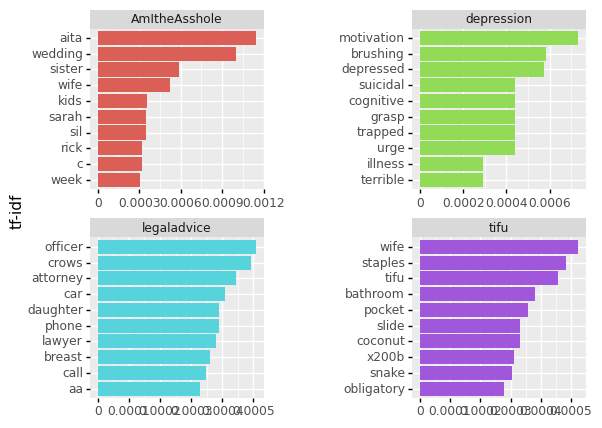

<ggplot: (159461012583)>

In [67]:
from tidytext import bind_tf_idf
from plotnine import *
from siuba.dply.forcats import fct_reorder

dfs_count = count(dfs_words, _.word, _.subreddit, sort=True)
dfs_tf_idf = bind_tf_idf(dfs_count, 'word', 'subreddit', 'n')

dfs_tf_idf = ungroup(group_by(arrange(dfs_tf_idf, -_.tf_idf), 'subreddit').head(10))

dfs_tf_idf = arrange(dfs_tf_idf, _.subreddit, -_.tf_idf)


ggplot(dfs_tf_idf) \
    + aes(x=fct_reorder(dfs_tf_idf['word'], x=dfs_tf_idf['tf_idf']), y='tf_idf', fill='subreddit') \
    + coord_flip() \
    + geom_col(show_legend=False) \
    + facet_wrap('~subreddit', ncol = 2, scales = "free") \
    + labs(x = "tf-idf", y = None) \
    + theme(subplots_adjust={'wspace': 0.85, 'hspace': 0.3}) \
    + scale_x_discrete()



Pick any post of your choice and:



5. Do any exploration you find suitable, anything goes. (probably worth making use of the comments from the post)




In [37]:
# Write your code below
from tidytext import *